# SONAR Rock Vs Mine Prediction

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score, KFold


In [ ]:
from sklearn.linear_model import Log

In [ ]:
# Load the dataset
sonar_data = pd.read_csv('Copy of sonar data.csv',header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar_data.shape

(208, 61)

In [ ]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


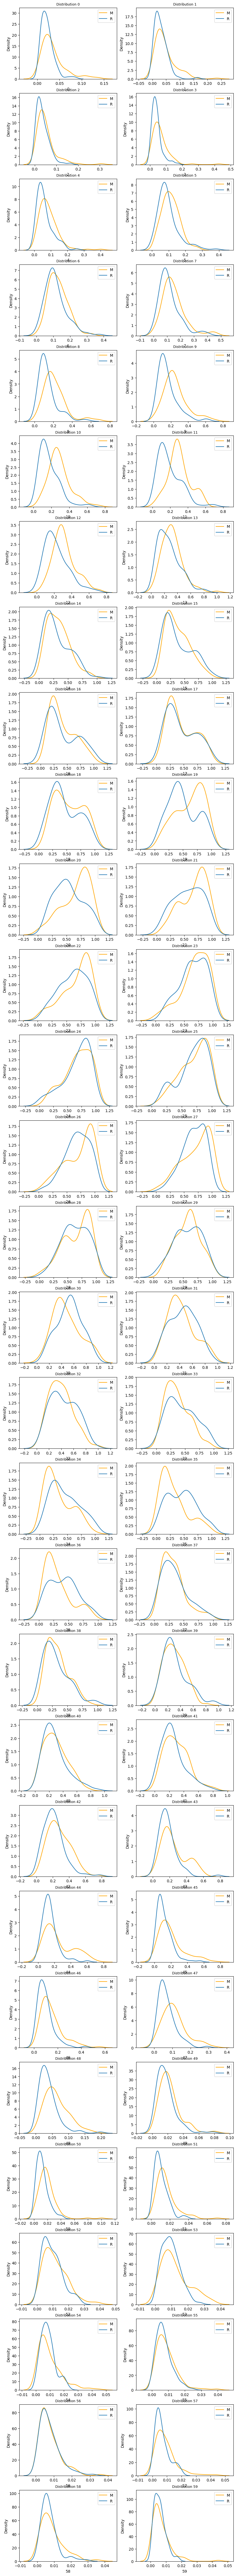

In [ ]:
#EDA
plt.figure(figsize=(10,120))
for i, num in enumerate(range(60)):
    plt.subplot(30,2, i+1)
    sns.kdeplot(sonar_data[sonar_data[60] == 'M'][num], label = 'M', color='orange')
    sns.kdeplot(sonar_data[sonar_data[60] == 'R'][num], label = 'R')
    plt.legend()
    plt.title(f'Distribution {num}', fontsize=9)

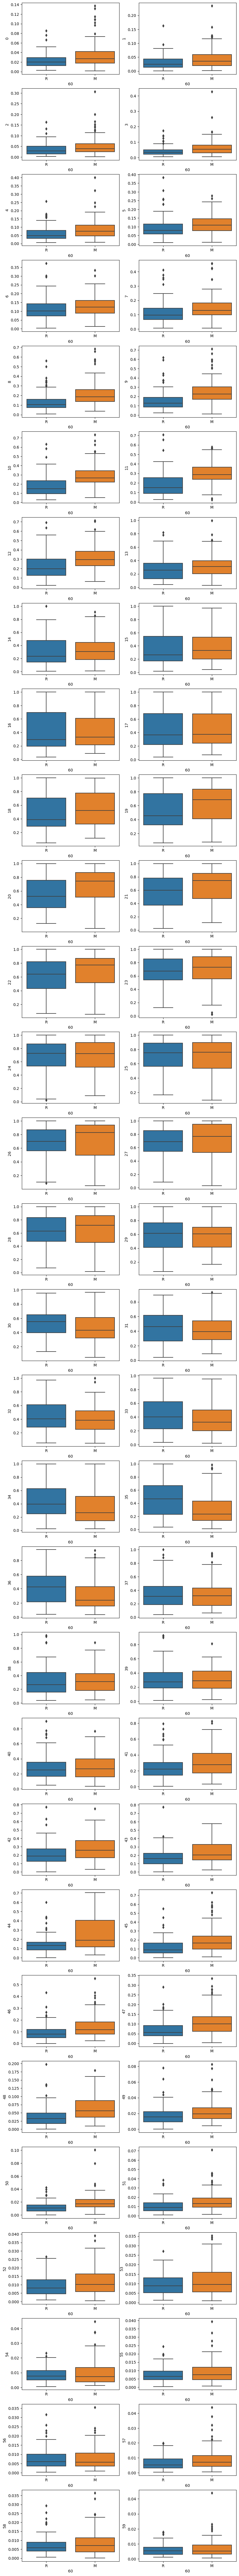

In [ ]:
plt.figure(figsize=(10,120))
for i, num in enumerate(range(60)):
    plt.subplot(30,2, i+1)
    sns.boxplot(y=sonar_data[num], x=sonar_data[60])

In [ ]:
# separate the X's and Y
X = sonar_data.drop(columns=60,axis=1)
Y = sonar_data[60]

# Without PCA

In [ ]:
# Split the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=42)

******Logistic Regression******

In [ ]:
# Create a logistic Regression
model1=LogisticRegression()
model1.fit(X_train,Y_train)

# Accuracy on Training Data
X_train_prediction_1 = model1.predict(X_train)
training_data_accuracy_1 = accuracy_score(X_train_prediction_1,Y_train)
print('Training Data Accuracy for Logistic Regression = ',round(training_data_accuracy_1*100,2))

# Accuracy on Test Data
X_test_prediction_1 = model1.predict(X_test)
test_data_accuracy_1 = accuracy_score(X_test_prediction_1,Y_test)
print('Training Data Accuracy for Logistic Regression = ',round(test_data_accuracy_1*100,2))

scores = cross_val_score(model1, X, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

# View the coefficients
print("Coefficients:", model1.coef_)

# View the intercept
print("Intercept:", model1.intercept_)



Training Data Accuracy for Logistic Regression =  84.14
Training Data Accuracy for Logistic Regression =  76.19
Cross-validation scores: [0.45238095 0.76190476 0.61904762 0.82926829 0.48780488]
Mean cross-validation score: 0.6300813008130082
Coefficients: [[-0.12930626 -0.16167669 -0.16395726 -0.4123119  -0.19536167  0.16571369
   0.24827073  0.15312542 -0.78165109 -1.01682343 -1.16595453 -1.13411957
  -0.88423959 -0.08249565  0.40944414  0.67372218  0.58668147  0.10746685
  -0.41459003 -0.78417352 -0.88130538 -0.64172126 -0.22632742  0.01942676
   0.22419127  0.5472019   0.08258999 -0.69074431 -0.11186335  0.11256952
   0.82893687 -0.45274046  0.08056076  0.51665611  0.24932024  1.01360768
   0.67248829 -0.43087651 -0.76992223  0.14248715 -0.44283935 -0.5207115
  -0.88529686 -0.90867203 -1.007725   -0.8337859  -0.67981401 -0.66374076
  -0.40229279 -0.07712687 -0.12168688 -0.11258484 -0.06190978 -0.07601783
  -0.01044049 -0.05008295 -0.01308799 -0.06385518 -0.04673002 -0.02208834]]
Int

**Decision Tree**

In [ ]:
# develop the Decision Tree
model2 = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Set up the grid search
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best cross-validation score: 0.7103448275862069


Training Data Accuracy for Decision Tree =  94.48
Training Data Accuracy for Decision Tree =  71.43
Cross-validation scores: [0.47619048 0.61904762 0.73809524 0.80487805 0.53658537]
Mean cross-validation score: 0.634959349593496

[Text(0.5294117647058824, 0.9285714285714286, 'x[9] <= 0.163\nentropy = 0.997\nsamples = 145\nvalue = [77, 68]'), Text(0.29411764705882354, 0.7857142857142857, 'x[3] <= 0.058\nentropy = 0.824\nsamples = 62\nvalue = [16, 46]'), Text(0.17647058823529413, 0.6428571428571429, 'x[43] <= 0.393\nentropy = 0.482\nsamples = 48\nvalue = [5, 43]'), Text(0.11764705882352941, 0.5, 'x[17] <= 0.809\nentropy = 0.267\nsamples = 44\nvalue = [2, 42]'), Text(0.058823529411764705, 0.35714285714285715, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40]'), Text(0.17647058823529413, 0.35714285714285715, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'), Text(0.23529411764705882, 0.5, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'), Text(0.4117647058823529, 0.6428571428571429, 'x[36] <= 0.487\

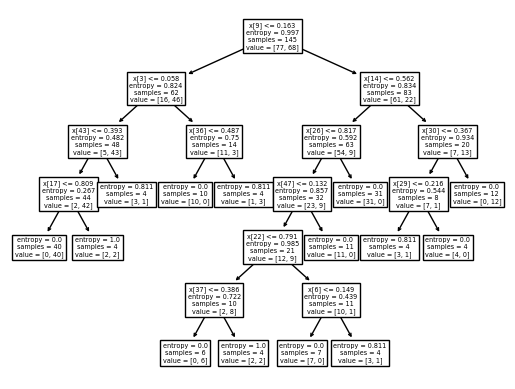

In [ ]:
# Develop the optimum Decision Tree
model2 = grid_search.best_estimator_
model2.fit(X_train,Y_train)

# Accuracy on Training Data
X_train_prediction_2 = model2.predict(X_train)
training_data_accuracy_2 = accuracy_score(X_train_prediction_2,Y_train)
print('Training Data Accuracy for Decision Tree = ',round(training_data_accuracy_2*100,2))

# Accuracy on Test Data
X_test_prediction_2 = model2.predict(X_test)
test_data_accuracy_2 = accuracy_score(X_test_prediction_2,Y_test)
print('Training Data Accuracy for Decision Tree = ',round(test_data_accuracy_2*100,2))
scores = cross_val_score(model2, X, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

print('')

print(plot_tree(model2))

***Bagging***

In [ ]:
# Define the base estimator
base = DecisionTreeClassifier()

# Define the Bagging classifier
model3 = BaggingClassifier(estimator=base, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [40, 50, 60],
    'max_samples': [0.4, 0.5, 0.6],
    'base_estimator__max_depth': [None, 4, 5, 6],
    'base_estimator__min_samples_split': [2, 3, 4, 5]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


C:\Users\raqui\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:929: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best parameters: {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 2, 'max_samples': 0.6, 'n_estimators': 50}
Best cross-validation score: 0.8275862068965516


In [ ]:
# optimum bagging
model3 = grid_search.best_estimator_
model3.fit(X_train, Y_train)

# Accuracy on Training Data
X_train_prediction_3 = model3.predict(X_train)
training_data_accuracy_3 = accuracy_score(X_train_prediction_3,Y_train)
print('Training Data Accuracy for Bagging = ',round(training_data_accuracy_3*100,2))

# Accuracy on Test Data
X_test_prediction_3 = model3.predict(X_test)
test_data_accuracy_3 = accuracy_score(X_test_prediction_3,Y_test)
print('Training Data Accuracy for Bagging = ',round(test_data_accuracy_3*100,2))

scores = cross_val_score(model3, X, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Training Data Accuracy for Bagging =  100.0
Training Data Accuracy for Bagging =  80.95
Cross-validation scores: [0.47619048 0.73809524 0.64285714 0.82926829 0.68292683]
Mean cross-validation score: 0.6738675958188154


***Random Forest***

In [ ]:
# Create a Random Forest classifier
model4 = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [40, 60, 80],
    'max_depth': [None, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
# Set up the grid search
grid_search = GridSearchCV(estimator=model4, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Best cross-validation score: 0.8482758620689654


C:\Users\raqui\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
456 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raqui\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raqui\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\raqui\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\raqui\anaconda3\Lib\site-packa

In [ ]:
# Optimum Random Forest
model4 = grid_search.best_estimator_
model4.fit(X_train, Y_train)

# Accuracy on Training Data
X_train_prediction_4 = model4.predict(X_train)
training_data_accuracy_4 = accuracy_score(X_train_prediction_4,Y_train)
print('Training Data Accuracy for Random Forest = ',round(training_data_accuracy_4*100,2))

# Accuracy on Test Data
X_test_prediction_4 = model4.predict(X_test)
test_data_accuracy_4 = accuracy_score(X_test_prediction_4,Y_test)
print('Training Data Accuracy for Randaom Forest = ',round(test_data_accuracy_4*100,2))

scores = cross_val_score(model4, X, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))


Training Data Accuracy for Random Forest =  100.0
Training Data Accuracy for Randaom Forest =  82.54
Cross-validation scores: [0.47619048 0.73809524 0.66666667 0.73170732 0.6097561 ]
Mean cross-validation score: 0.6444831591173055


# With PCA

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Apply PCA to reduce to a specified number of components
pca = PCA(n_components=29)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:", cumulative_variance)


Explained variance ratio: [0.20346557 0.18897216 0.08549989 0.0567919  0.0500708  0.04064995
 0.03278992 0.03046466 0.02565961 0.02491102 0.0207528  0.0190199
 0.0174698  0.01538484 0.01427797 0.01360959 0.01234608 0.01168646
 0.01030774 0.00979002 0.00944079 0.00887561 0.00839874 0.00770838
 0.0072193  0.00696371 0.00615371 0.005316   0.00524715]
Cumulative explained variance: [0.20346557 0.39243773 0.47793762 0.53472952 0.58480032 0.62545027
 0.65824019 0.68870485 0.71436446 0.73927548 0.76002828 0.77904818
 0.79651798 0.81190282 0.82618079 0.83979038 0.85213646 0.86382292
 0.87413066 0.88392068 0.89336148 0.90223708 0.91063582 0.9183442
 0.9255635  0.93252721 0.93868092 0.94399692 0.94924407]


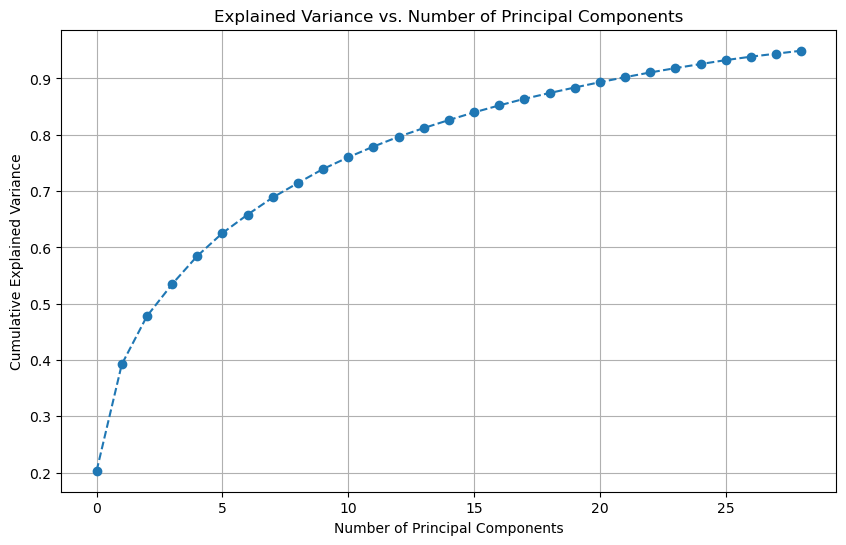

In [ ]:
import matplotlib.pyplot as plt

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
principal_df = pd.DataFrame(data=X_pca)
principal_df


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.921168,-1.370893,-1.666476,0.837913,-1.057324,1.712504,1.785716,-1.581264,0.335418,-1.028065,...,0.866819,-1.208238,0.723202,0.304876,0.120470,-0.458567,-0.021847,-1.089710,0.096606,0.168123
1,-0.480125,7.586388,-1.275734,3.859346,2.121112,-2.186818,-1.742764,1.517061,0.307933,-1.341882,...,-0.048882,-2.388110,0.021429,-0.145524,-0.246021,0.117770,0.704112,-0.052387,-0.240064,-0.178744
2,3.859228,6.439860,-0.030635,5.454599,1.552060,1.181619,-1.820138,-1.495929,-1.152459,-1.006030,...,-1.841670,-1.740823,-2.000942,-0.295682,1.931963,0.758036,-0.113901,0.964319,0.214707,0.527529
3,4.597419,-3.104089,-1.785344,-1.115908,-2.785528,-2.072673,2.084530,1.707289,0.452390,-1.117318,...,-0.999830,-0.685825,1.307367,-0.662918,1.142591,-0.352601,-0.491193,-0.061186,0.150725,1.389191
4,-0.533868,1.849847,-0.860097,3.302076,2.808954,-0.783945,0.362657,0.812621,0.184578,-0.023594,...,-0.976459,0.503340,0.258970,0.253982,1.199262,-0.165722,-0.041342,-0.589311,-0.500720,-1.549835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1.207653,-0.968174,3.116148,-0.212490,2.306835,1.151569,0.010206,-1.606494,0.587992,-2.089473,...,0.459055,-0.726467,1.502574,0.998375,0.354848,0.574440,-0.227370,0.018024,-0.263487,-0.519127
204,-2.971439,-2.753492,2.500966,0.478754,2.157206,0.928558,-0.738412,-0.105210,-0.748383,-0.255461,...,0.462129,-0.322669,0.813577,1.199087,-0.072821,-0.067014,0.266986,-0.546090,-0.196071,-0.556452
205,-2.293210,-2.755446,2.388467,0.130616,2.759021,1.049497,-0.449578,-1.619202,0.317789,-0.394252,...,-0.934887,-0.889517,0.455209,-0.579867,0.694111,-0.110719,-0.540177,-0.159715,-0.063610,-0.197417
206,-3.114464,-1.850550,2.420486,0.382211,1.658317,0.917819,1.078272,-0.364099,0.536476,0.457437,...,-0.198098,-0.522412,0.819959,0.889204,0.788375,1.382816,-0.383245,0.233065,0.082651,0.299606


In [ ]:
principal_df = pd.DataFrame(data=X_pca)
principal_df

***Logistic Regression***

In [ ]:
# Create a logistic Regression
model5=LogisticRegression()
model5.fit(pca_train,Y_train)

# Accuracy on Training Data
X_train_prediction_5 = model5.predict(pca_train)
training_data_accuracy_5 = accuracy_score(X_train_prediction_5,Y_train)
print('Training Data Accuracy for Logistic Regression = ',round(training_data_accuracy_5*100,2))

# Accuracy on Test Data
X_test_prediction_5 = model5.predict(pca_test)
test_data_accuracy_5 = accuracy_score(X_test_prediction_5,Y_test)
print('Training Data Accuracy for Logistic Regression = ',round(test_data_accuracy_5*100,2))

scores = cross_val_score(model5, principal_df, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

# View the coefficients
print("Coefficients:", model5.coef_)

# View the intercept
print("Intercept:", model5.intercept_)


Training Data Accuracy for Logistic Regression =  86.9
Training Data Accuracy for Logistic Regression =  79.37
Cross-validation scores: [0.45238095 0.64285714 0.66666667 0.75609756 0.65853659]
Mean cross-validation score: 0.6353077816492451
Coefficients: [[-0.39664228 -0.40921653 -0.96387671  0.11576024  0.19205147 -0.18522964
  -0.84700139  0.28983173  1.30901809 -0.65014498 -0.17285367 -0.15677598
   0.21114351 -0.14005081  0.63962432 -0.60535407 -0.75658969 -0.53079751
  -0.06543014 -0.20837682  0.08629547 -0.58522437 -0.09972351  0.62801017
   0.2923613   0.27752926  0.39107942  0.46836071 -0.21554738]]
Intercept: [-0.60746185]


***Decision Tree***

In [ ]:
# develop the Decision Tree
model6 = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Set up the grid search
grid_search = GridSearchCV(estimator=model6, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Fit the grid search
grid_search.fit(pca_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

C:\Users\raqui\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best cross-validation score: 0.7448275862068966


Training Data Accuracy for Decision Tree =  93.79
Training Data Accuracy for Decision Tree =  74.6
Cross-validation scores: [0.57142857 0.66666667 0.61904762 0.85714286 0.57142857 0.52380952
 0.66666667 0.66666667 0.75       0.9       ]
Mean cross-validation score: 0.6792857142857144

[Text(0.39705882352941174, 0.9285714285714286, 'x[2] <= 1.514\ngini = 0.498\nsamples = 145\nvalue = [77, 68]'), Text(0.3382352941176471, 0.7857142857142857, 'x[1] <= -1.399\ngini = 0.472\nsamples = 110\nvalue = [42, 68]'), Text(0.11764705882352941, 0.6428571428571429, 'x[10] <= -1.236\ngini = 0.278\nsamples = 42\nvalue = [7, 35]'), Text(0.058823529411764705, 0.5, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'), Text(0.17647058823529413, 0.5, 'x[2] <= 0.199\ngini = 0.153\nsamples = 36\nvalue = [3, 33]'), Text(0.11764705882352941, 0.35714285714285715, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'), Text(0.23529411764705882, 0.35714285714285715, 'x[0] <= -2.621\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'), Text(0

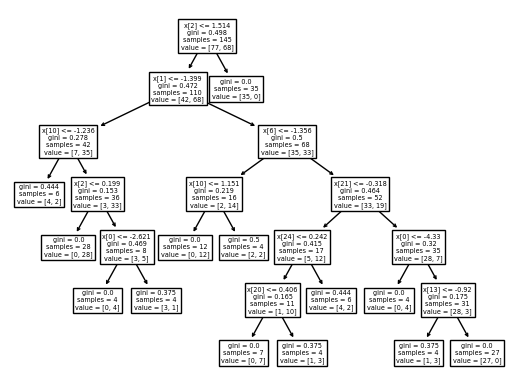

In [ ]:
# Optimum Decision Tree
model6 = grid_search.best_estimator_
model6.fit(pca_train,Y_train)

# Accuracy on Training Data
X_train_prediction_6 = model6.predict(pca_train)
training_data_accuracy_6 = accuracy_score(X_train_prediction_6,Y_train)
print('Training Data Accuracy for Decision Tree = ',round(training_data_accuracy_6*100,2))

# Accuracy on Test Data
X_test_prediction_6 = model6.predict(pca_test)
test_data_accuracy_6 = accuracy_score(X_test_prediction_6,Y_test)
print('Training Data Accuracy for Decision Tree = ',round(test_data_accuracy_6*100,2))
scores = cross_val_score(model6, principal_df, Y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

print('')

print(plot_tree(model6))

***Bagging***

In [ ]:
# Define the base estimator
base = DecisionTreeClassifier()

# Define the Bagging classifier
model7 = BaggingClassifier(estimator=base, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [40, 50, 60],
    'max_samples': [0.4, 0.5, 0.6],
    'base_estimator__max_depth': [None, 4, 5, 6],
    'base_estimator__min_samples_split': [2, 3, 4, 5]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model7, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Fit the grid search
grid_search.fit(pca_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 2, 'max_samples': 0.6, 'n_estimators': 50}
Best cross-validation score: 0.7862068965517242


C:\Users\raqui\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:929: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


In [ ]:
# Optimum bagging
model7 = grid_search.best_estimator_
model7.fit(pca_train,Y_train)

# Accuracy on Training Data
X_train_prediction_7 = model7.predict(pca_train)
training_data_accuracy_7 = accuracy_score(X_train_prediction_7,Y_train)
print('Training Data Accuracy for Bagging = ',round(training_data_accuracy_7*100,2))

# Accuracy on Test Data
X_test_prediction_7 = model7.predict(pca_test)
test_data_accuracy_7 = accuracy_score(X_test_prediction_7,Y_test)
print('Training Data Accuracy for Bagging = ',round(test_data_accuracy_7*100,2))

scores = cross_val_score(model7, principal_df, Y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Training Data Accuracy for Bagging =  100.0
Training Data Accuracy for Bagging =  77.78
Cross-validation scores: [0.57142857 0.61904762 0.76190476 0.71428571 0.66666667 0.66666667
 0.47619048 0.71428571 0.65       0.9       ]
Mean cross-validation score: 0.6740476190476191


***Random Forest***

In [ ]:
# Create a Random Forest classifier
model8 = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [40, 60, 80],
    'max_depth': [None, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
# Set up the grid search
grid_search = GridSearchCV(estimator=model8, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(pca_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40}
Best cross-validation score: 0.793103448275862


C:\Users\raqui\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
329 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raqui\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raqui\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\raqui\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\raqui\anaconda3\Lib\site-packa

In [ ]:
# Optimum Random forest
model8 = grid_search.best_estimator_
model8.fit(pca_train,Y_train)

# Accuracy on Training Data
X_train_prediction_8 = model8.predict(pca_train)
training_data_accuracy_8 = accuracy_score(X_train_prediction_8,Y_train)
print('Training Data Accuracy for Random Forest = ',round(training_data_accuracy_8*100,2))

# Accuracy on Test Data
X_test_prediction_8 = model8.predict(pca_test)
test_data_accuracy_8 = accuracy_score(X_test_prediction_8,Y_test)
print('Training Data Accuracy for Randaom Forest = ',round(test_data_accuracy_8*100,2))

scores = cross_val_score(model8, principal_df, Y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))


Training Data Accuracy for Random Forest =  99.31
Training Data Accuracy for Randaom Forest =  74.6
Cross-validation scores: [0.38095238 0.47619048 0.71428571 0.61904762 0.71428571 0.66666667
 0.57142857 0.85714286 0.65       0.85      ]
Mean cross-validation score: 0.65
